<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

# Project HR

Kaggle project with the aim of predicting attrition of employees.

**Attrition:** is the departure of employees from an organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

### Link to Project Description: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Import Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
sns.set(color_codes=True)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Load Dataset

In [6]:
hr = pd.read_csv("HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Key for Ordinal Features

Education ---> 1 = 'Below College' 2 = 'College' 3 = 'Bachelor' 4 = 'Master' 5 = 'Doctor'

EnvironmentSatisfaction ---> 1 = 'Low' 2 = 'Medium' 3 = 'High' 4 = 'Very High'

JobInvolvement ---> 1 = 'Low' 2 = 'Medium' 3 = 'High' 4 = 'Very High'

JobSatisfaction ---> 1 = 'Low' 2 = 'Medium' 3 = 'High' 4 = 'Very High'

PerformanceRating ---> 1 = 'Low' 2 = 'Good' 3 = 'Excellent' 4 = 'Outstanding'

RelationshipSatisfaction ---> 1 = 'Low' 2 = 'Medium' 3 = 'High' 4 = 'Very High'

WorkLifeBalance ---> 1 = 'Bad' 2 = 'Good' 3 = 'Better' 4 = 'Best'

The dependent or target variable is **Attrition**.

In [8]:
# Let's map our ordinal features onto their values.

hr["Education"] = hr["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
hr["EnvironmentSatisfaction"] = hr["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
hr["JobInvolvement"] = hr["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
hr["JobSatisfaction"] = hr["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
hr["PerformanceRating"] = hr["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
hr["RelationshipSatisfaction"] = hr["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
hr["WorkLifeBalance"] = hr["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Taking a quick glance of our data

In [10]:
hr.shape

(1470, 35)

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [12]:
hr.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,1.00,"1,024.87",65.89,2.06,"6,502.93","14,313.10",2.69,15.21,80.00,0.79,11.28,2.80,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,0.00,602.02,20.33,1.11,"4,707.96","7,117.79",2.50,3.66,0.00,0.85,7.78,1.29,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,"1,009.00","2,094.00",0.00,11.00,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,1.00,491.25,48.00,1.00,"2,911.00","8,047.00",1.00,12.00,80.00,0.00,6.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,1.00,"1,020.50",66.00,2.00,"4,919.00","14,235.50",2.00,14.00,80.00,1.00,10.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,1.00,"1,555.75",83.75,3.00,"8,379.00","20,461.50",4.00,18.00,80.00,1.00,15.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,1.00,"2,068.00",100.00,5.00,"19,999.00","26,999.00",9.00,25.00,80.00,3.00,40.00,6.00,40.00,18.00,15.00,17.00


In [13]:
hr.describe(include = 'object')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,9,4,3,1,2,2,4,4
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,Y,No,Excellent,High,Better
freq,1233,1043,961,572,606,453,882,868,326,459,673,1470,1054,1244,459,893


<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Data Cleaning

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 18px;">


A couple of observations that stood out from reviewing the basic statistical information:
* **EmployeeCount**: All the values are 1. We can drop this column.
* **EmployeeNumber**: Sequential count. We can drop this column.
* **StandardHours**: All the values are 80. We can drop this column.
* **Over18**: All employees are over 18 years of age. We can drop this column.




In [16]:
#Separate hr into numeric and categorical sets and remove the variables mentioned above. 
 
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']

hr.drop(columns=remove_list, inplace=True)

col_numerical = list(hr.describe().columns)
col_categorical = list(set(hr.columns).difference(col_numerical))

In [17]:
#Check how many features we have in each column.

print(len(col_numerical))
print(type(col_categorical))
print(len(col_categorical))

16
<class 'list'>
15


In [18]:
col_categorical

['Department',
 'PerformanceRating',
 'Gender',
 'WorkLifeBalance',
 'BusinessTravel',
 'EducationField',
 'OverTime',
 'MaritalStatus',
 'EnvironmentSatisfaction',
 'RelationshipSatisfaction',
 'Attrition',
 'Education',
 'JobSatisfaction',
 'JobInvolvement',
 'JobRole']

In [19]:
# Let's check if we have any missing data.

hr.isnull().any()

# It seems like our data came clean!

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [20]:
# Let's check for duplicates

print(hr.duplicated().sum())

# No duplicates!

0


<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## EDA

### What does the distribution of attrition look like?

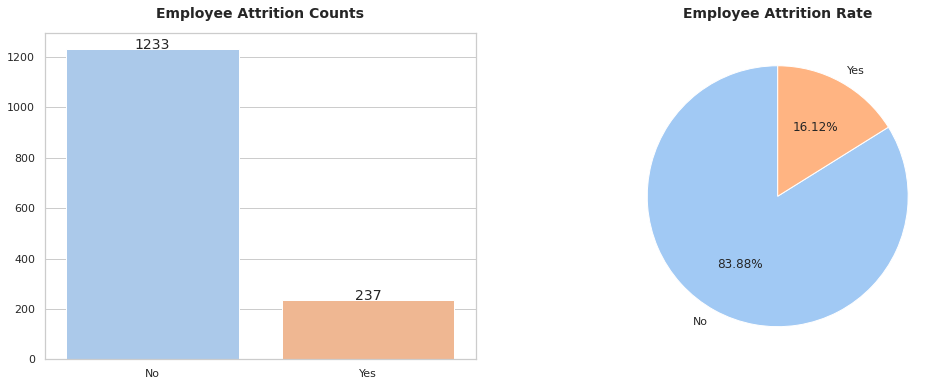

In [23]:
#Visualization to show Employee Attrition in Counts.
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_count = hr["Attrition"].value_counts()
sns.barplot(x=attrition_count.index,y=attrition_count.values)
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for index, value in enumerate(attrition_count.values):
    plt.text(index, value, value,ha="center", fontsize=14) #this forloop adds the number values at coordinate (index, values)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_count, labels=attrition_count.index, autopct='%1.2f%%', startangle=90)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Let's see how some of our categorical variables relate to attrition

In [25]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

#This function creates plots to visualize how categorical variables relate to attrition. 
#It also includes a chi-square test to check for significance.

def cat_attrition_plot(df, col, hue):
    plt.figure(figsize=(15, 7))
    
    #Extract value counts for the specified column
    col_count = df[col].value_counts().sort_index()
    
    #First subplot: Pie chart showing the distribution of our variable of interest
    plt.subplot(1, 2, 1) 
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    plt.pie(col_count, labels=col_count.index, autopct='%1.2f%%', startangle=90)
    
    #Second subplot: Bar plot showing how our variable is distributed among those that stay
    plt.subplot(1, 2, 2)
    # Filter rows for 'Yes' and 'No' in the 'hue' column
    yes_df = df[df[hue] == 'Yes']
    no_df = df[df[hue] == 'No']
    #Calculate counts for both 'Yes' and 'No'
    yes_count = yes_df[col].value_counts().sort_index()
    no_count = no_df[col].value_counts().sort_index()
    #Calculate attrition rates
    attrition_rate_yes = (yes_count / col_count) * 100
    attrition_rate_no = (no_count / col_count) * 100
    #Create a bar plot for 'Yes'
    sns.barplot(x=yes_count.index, y=yes_count.values, label='Yes', color='salmon')
    #Create a bar plot for 'No', setting the bottom parameter
    sns.barplot(x=no_count.index, y=no_count.values, label='No', color='skyblue', 
                bottom=yes_count.values)
    #Add labels and title
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    #Add text labels for 'No' on top of bars
    for index, value in enumerate(col_count):
        plt.text(index, value, f"{no_count.iloc[index]} ({attrition_rate_no[index]:.1f}%)", 
                 ha="center", va="bottom", size=10)
    #Add text labels for 'Yes'
    for index, value in enumerate(yes_count):
        plt.text(index, value, f"{value} ({attrition_rate_yes[index]:.1f}%)", ha="center", 
                 va="bottom", size=10)
    # Chi-square test of independce:
    contingency_table = pd.crosstab(df[hue], df[col])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Format the chi-square results
    chi2_results = (
        f'Chi-square Statistic: {chi2_stat:.2f}\n'
        f'P-value: {p_value:.4f}\n'
        f'Degrees of Freedom: {dof}\n'
        f'Expected Frequencies:\n{expected.round()}\n')

    #Adjust the alignment for better presentation
    plt.figtext(1.0, 0.1, chi2_results, ha="left", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, 
                                                                      "pad":10})
    
    #Adjust layout for better spacing
    plt.tight_layout()
    
#Chi-square test of independce: is belonging in a specific value of a categorical variable related to attrition.

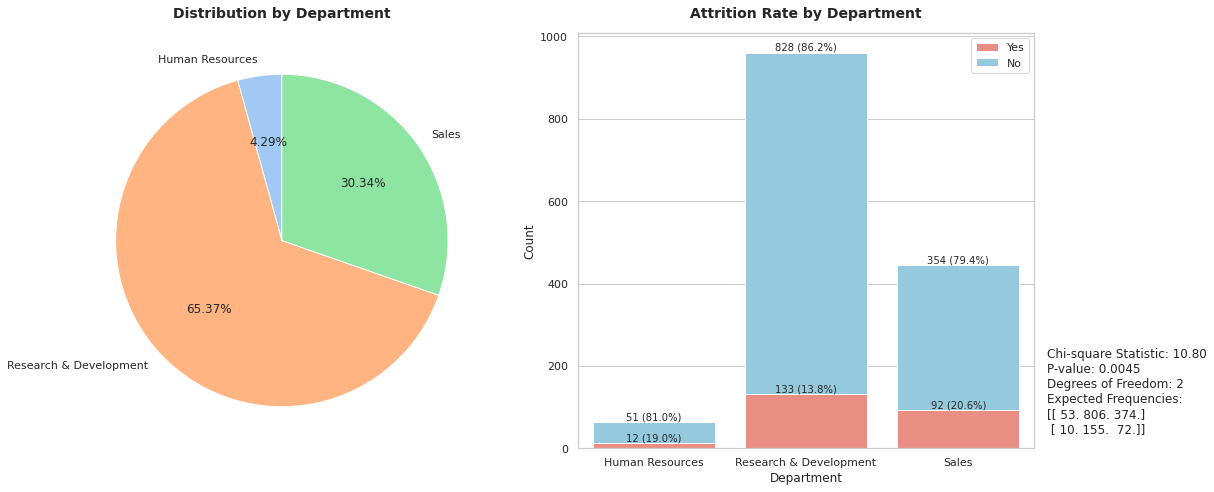

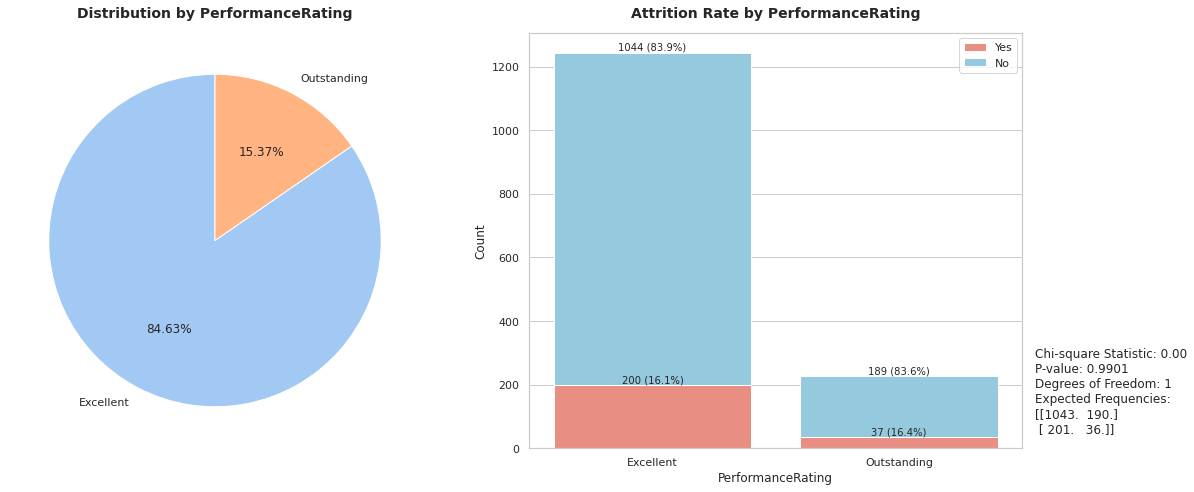

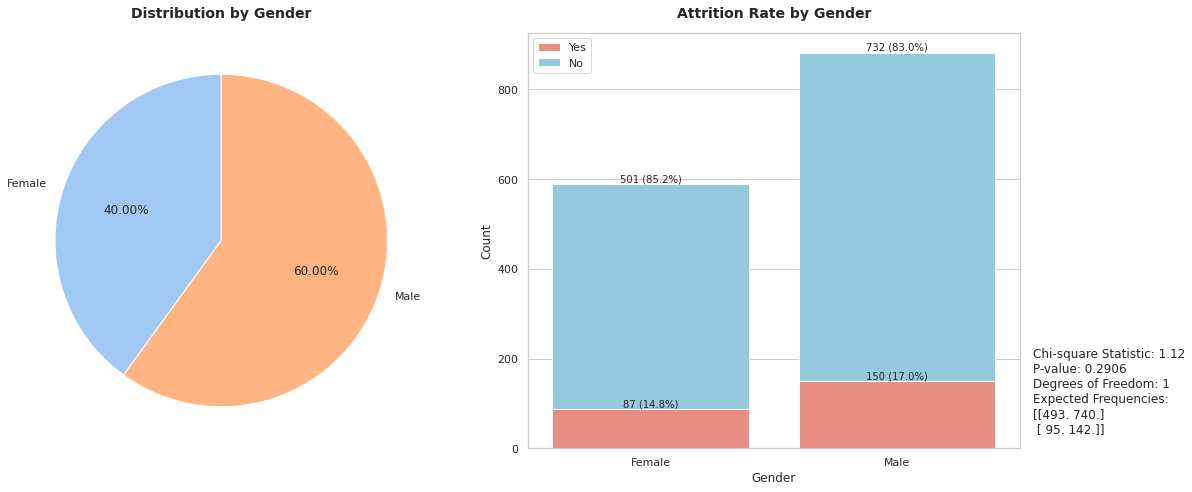

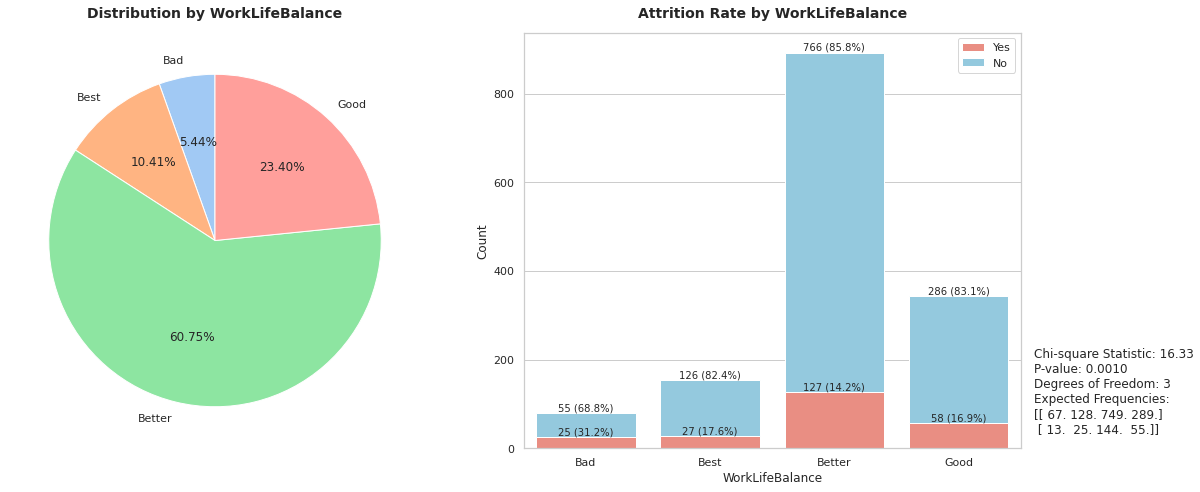

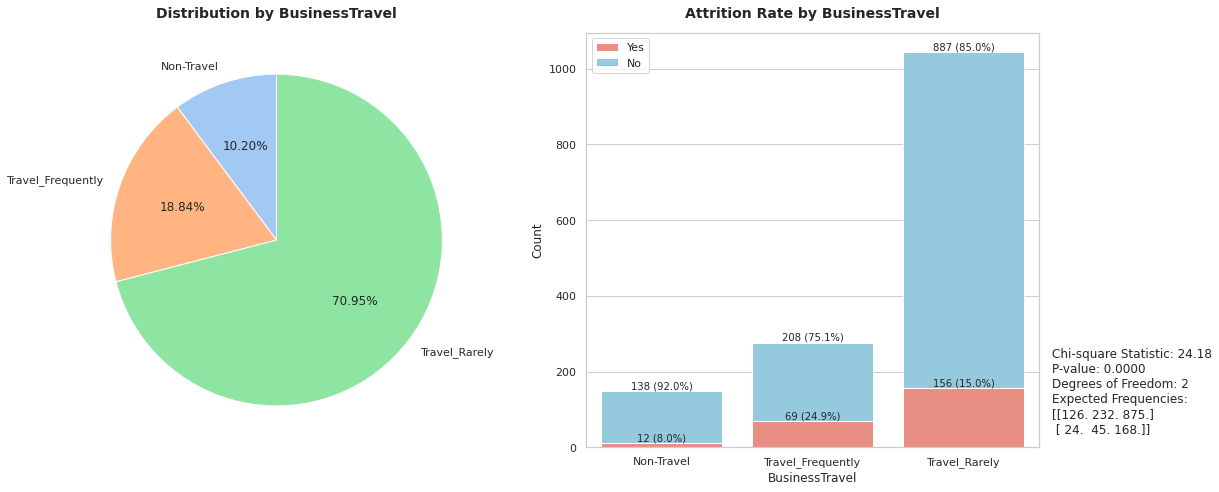

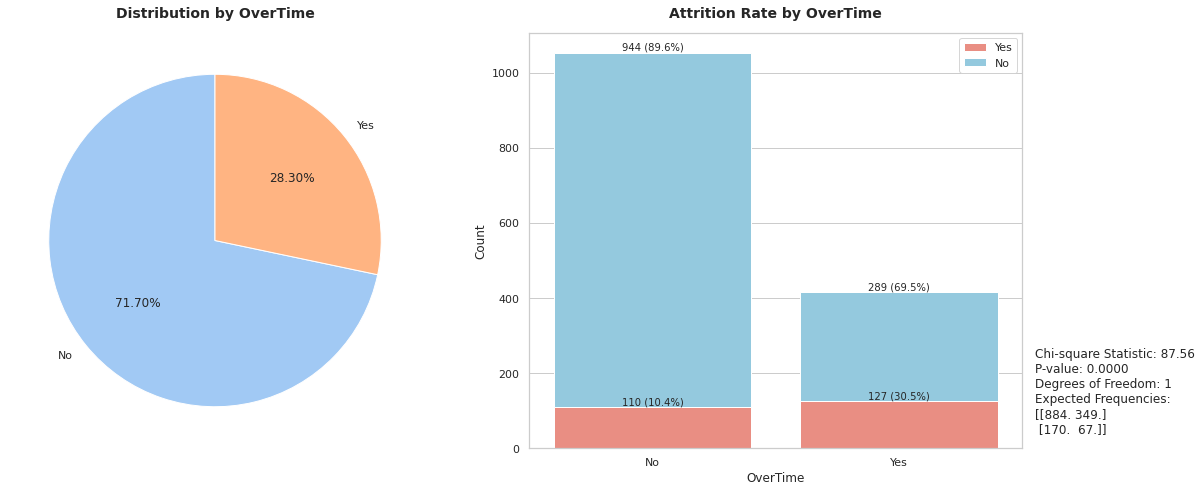

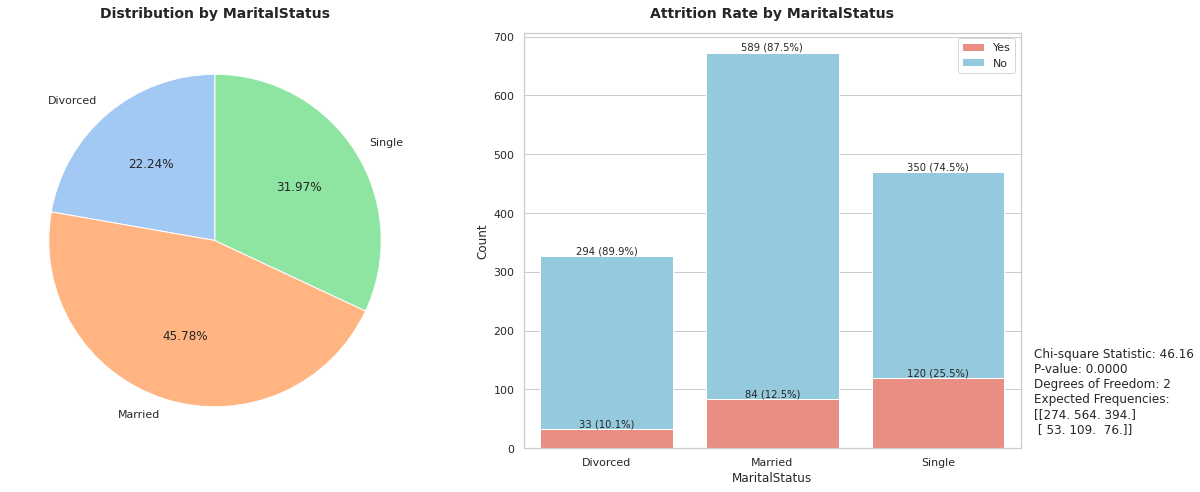

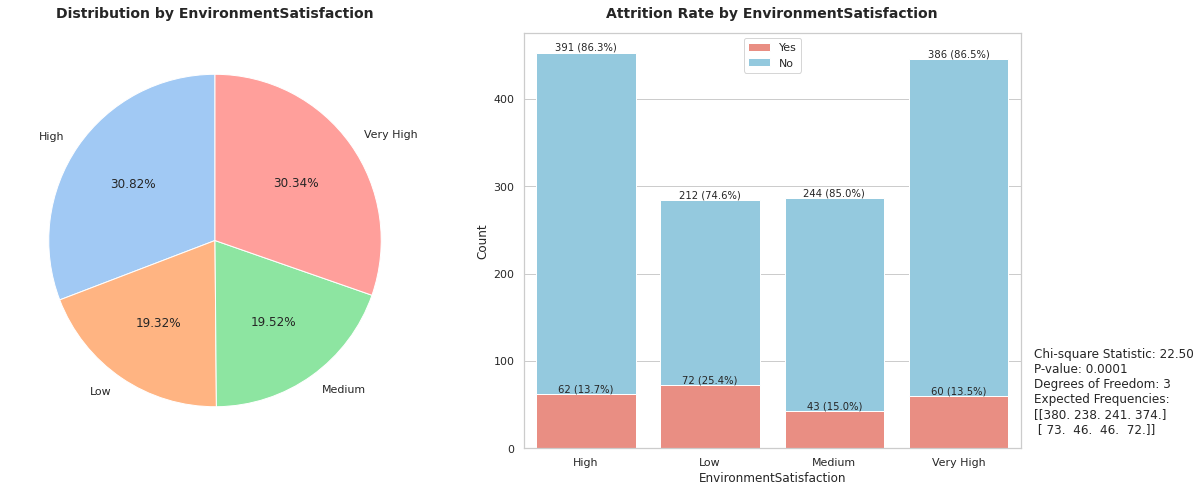

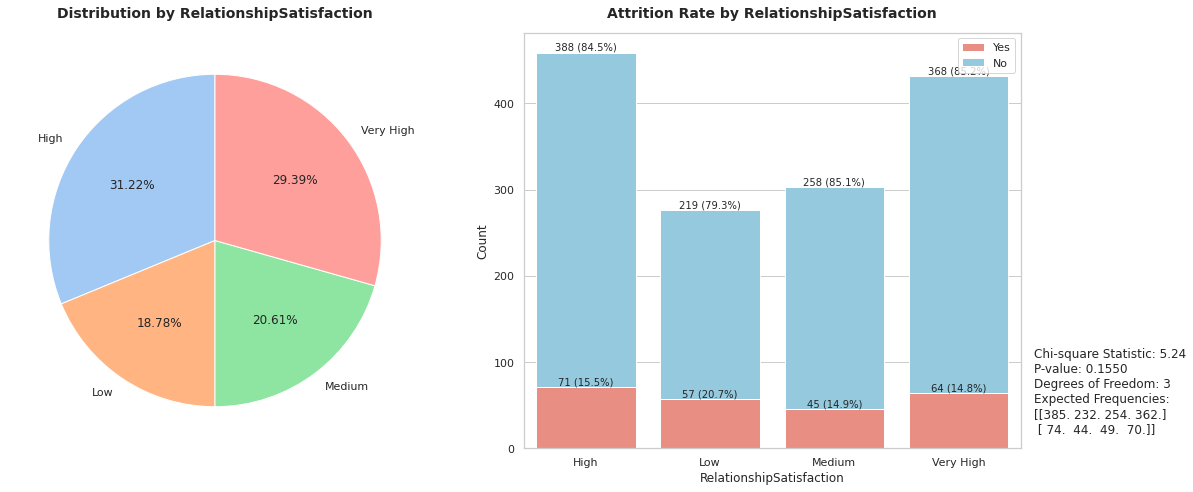

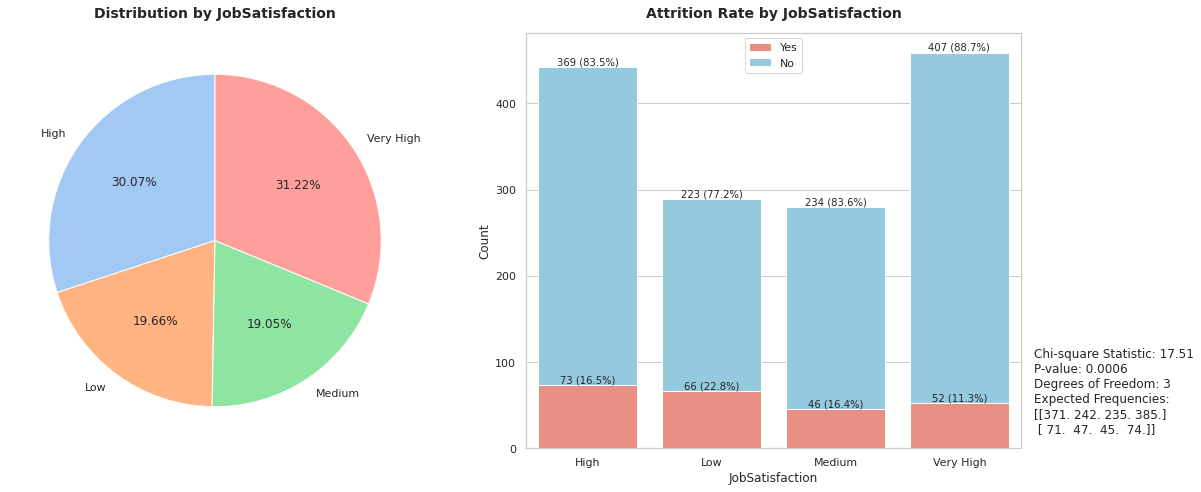

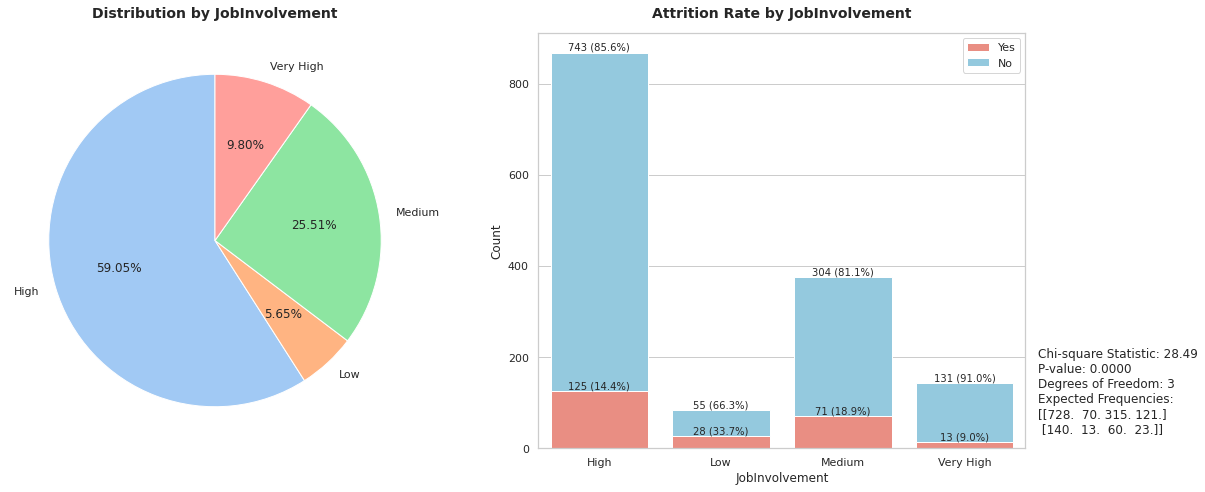

In [26]:
#I use the function above for features with 4 or less categories. 
#This was done to preseve the visual interpretability of our 

for column in col_categorical:
    if (len(hr[column].unique()) <= 4) and (column != 'Attrition'):
        cat_attrition_plot (hr, column, 'Attrition')
        plt.subplots_adjust(hspace=0.2)

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 18px;">

### Observations from the visualization and tests of independence above
        
- **Degree of job satisfaction appears to be related to attrition** 
    - Those with low satisfaction had the highest attrition rate
- **Business travel also appears to be related to attrition**
    - Those that travel frequently have the highest attrition rate
    - Perhaps there is something about role that requires travel that is leading to higher attrition rates 
- **Gender, relationship satisfaction, and performance rating are not significantly related to attrition.**
- **Marital status also appears to be related to attrition**
    - Those that are single have the highest attrition rate 
    - Things such as the ability to freely relocate and still being in the career exploration phase could be contributors 
- **Over time working status also seems to be related to attrition**
    - Those that have over time status have a higher attrition rate compared to those that don’t. 
    - The company's over time policies may require some examination. 
- **Work-life balance is also related to attrition**
    - Those that have a bad work-life balance are have the highest rate of attrition 
- **Job involvement is also related to attrition**
    - Those that have a low job involvement have the highest attrition rate.
- **Department is also related to attrition**
    - With those in Sales and HR having the highest attrition rates.
    - Work culture and employee satisfaction


In [28]:
#This function is similar to the one used above except the first visualization changes from a 
#pie chart to a bar plot for better visual clarity.

def count_percent_plot(df, col, hue):

    plt.figure(figsize=(20, 7))
    #First subplot: Bar chart showing distribution of col varialbe
    plt.subplot(1, 2, 1)
    col_count = df[col].value_counts().sort_index()
    sns.barplot(x=col_count.index, y=col_count.values, order=col_count.index, palette='pastel')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(col_count.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=45, ha='right')
    
    #Second subplot: Stacked bar chart showing attrition rates by col variable
    plt.subplot(1, 2, 2)
    #Filter rows for 'Yes' and 'No' in the 'hue' column
    yes_df = df[df[hue] == 'Yes']
    no_df = df[df[hue] == 'No']
    # Calculate counts for both 'Yes' and 'No'
    yes_count = yes_df[col].value_counts().sort_index()
    no_count = no_df[col].value_counts().sort_index()
    # Calculate attrition rates
    attrition_rate_yes = (yes_count / col_count) * 100
    attrition_rate_no = (no_count / col_count) * 100
    # Create a bar plot for 'Yes'
    sns.barplot(x=yes_count.index, y=yes_count.values, order=col_count.index, label='Yes', color='salmon')
    # Create a bar plot for 'No', setting the bottom parameter
    sns.barplot(x=no_count.index, y=no_count.values, order=col_count.index, label='No', color='skyblue', bottom=yes_count.values)
    # Add labels and title
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    # Add text labels for 'No' on top of bars
    for index, value in enumerate(col_count):
        plt.text(index, value, f"{no_count.iloc[index]} ({attrition_rate_no.iloc[index]:.1f}%)", ha="center", va="bottom", size=10)
    # Add text labels for 'Yes'
    for index, value in enumerate(yes_count):
        plt.text(index, value, f"{value} ({attrition_rate_yes[index]:.1f}%)", ha="center", va="bottom", size=10)
    plt.xticks(rotation=45, ha='right')
    
    contingency_table = pd.crosstab(df[hue], df[col])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Format the chi-square results
    chi2_results = (
        f'Chi-square Statistic: {chi2_stat:.2f}\n'
        f'P-value: {p_value:.4f}\n'
        f'Degrees of Freedom: {dof}\n'
        f'Expected Frequencies:\n{expected.round()}\n')

    #Adjust the alignment for better presentation
    plt.figtext(1.0, 0.1, chi2_results, ha="left", fontsize=12, bbox={"facecolor":"white", "alpha":0.5, 
                                                                      "pad":10})
    
    # Adjust layout for better spacing
    plt.tight_layout();

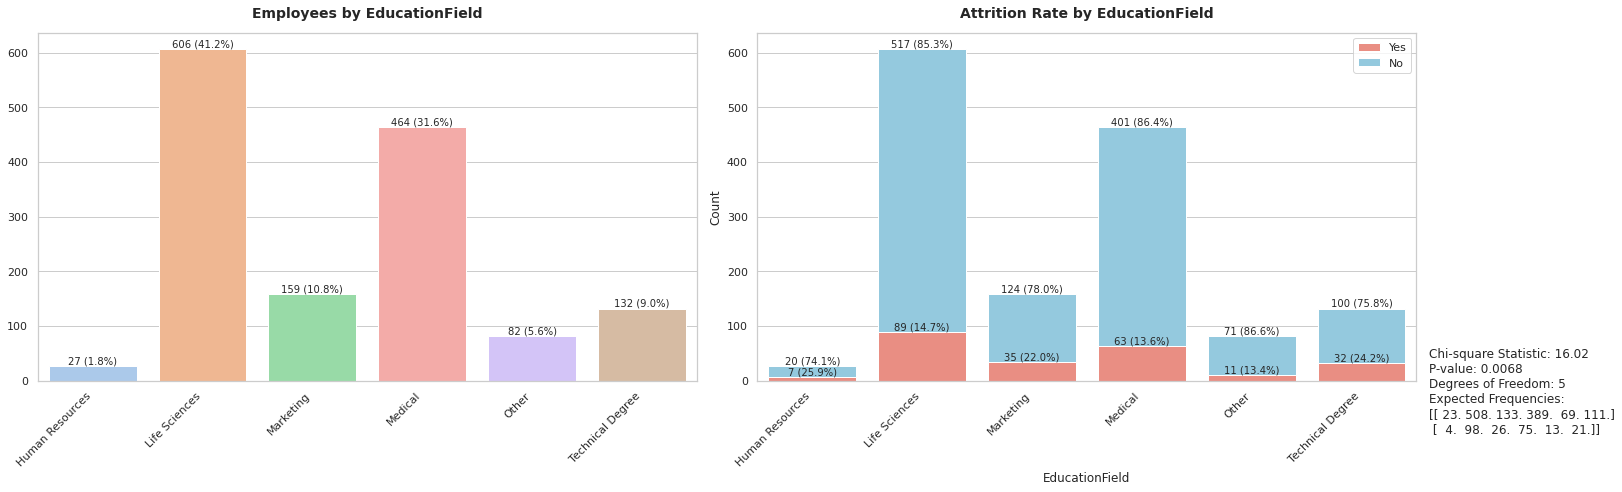

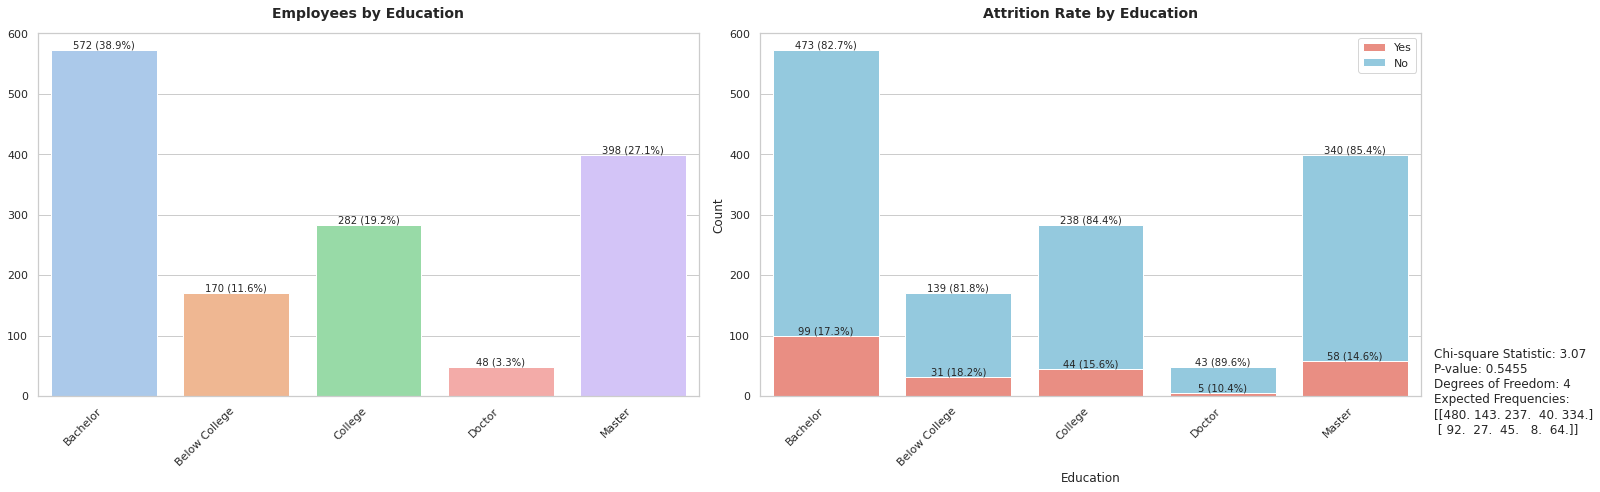

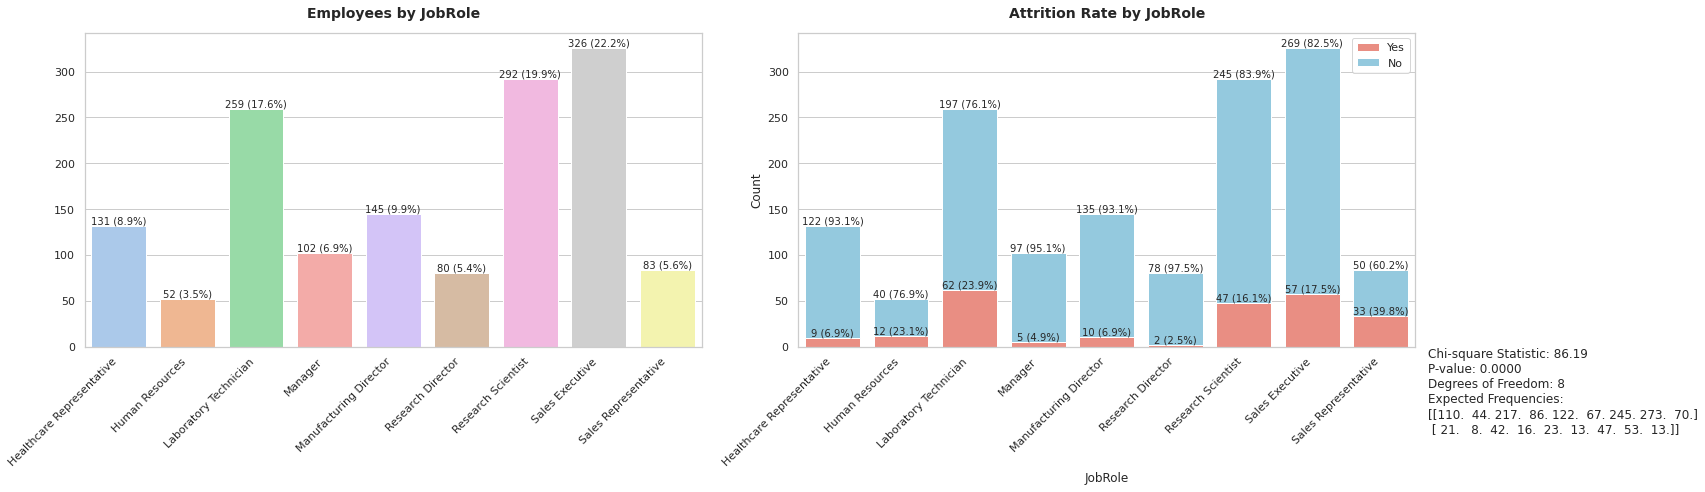

In [29]:
for column in col_categorical:
    if len(hr[column].unique()) > 4:
        count_percent_plot(hr, column, 'Attrition')

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 18px;">


### Observations from the visualization and tests of independence above

- **Education field is also related to attrition** 
    - Those with human resources, marketing, and technical degrees have the highest attrition rates.
- **Education level is not significantly related to attrition.**
- **Job role is related to attrition**
    - Sales reps have the highest attrition rate.
    - This may be due to the nature of the job or something to do with how the sales role is structured.


In [31]:
# Revert to our numerical maping for our ordinal features.

hr["Education"] = hr["Education"].replace({"Below College": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5})
hr["EnvironmentSatisfaction"] = hr["EnvironmentSatisfaction"].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
hr["JobInvolvement"] = hr["JobInvolvement"].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
hr["JobSatisfaction"] = hr["JobSatisfaction"].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
hr["PerformanceRating"] = hr["PerformanceRating"].replace({"Low": 1, "Good": 2, "Excellent": 3, "Outstanding": 4})
hr["RelationshipSatisfaction"] = hr["RelationshipSatisfaction"].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
hr["WorkLifeBalance"] = hr["WorkLifeBalance"].replace({"Bad": 1, "Good": 2, "Better": 3, "Best": 4})

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

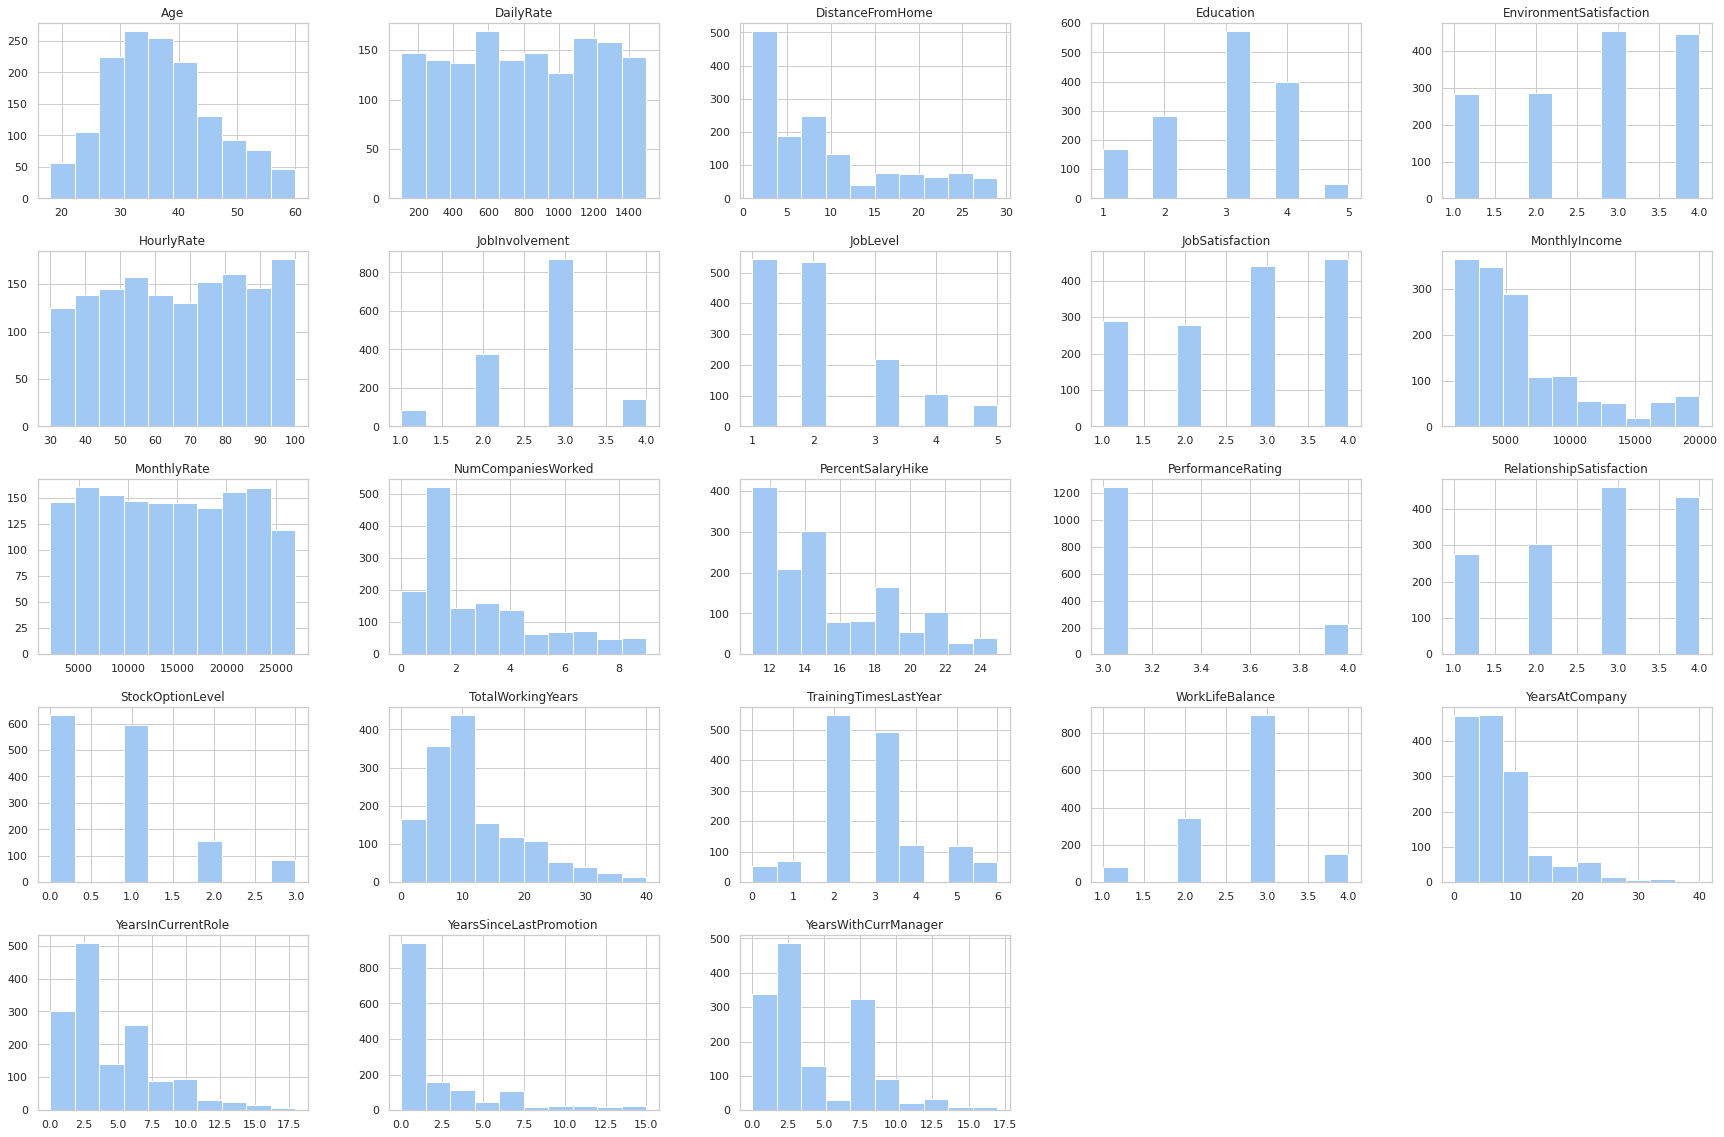

In [32]:
hr.hist(figsize=(30,20))

In [33]:
# Map attrition to numerical values

hr['Attrition'].unique()
attrition_to_num = {'Yes': 1,
                    'No': 0}
hr['Attrition_num'] = hr['Attrition'].map(attrition_to_num)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Let's create a correlation matrix to look at associations among our numerical values.

In [35]:
#Look at correlations among our numerical variables. 
#Using spearman because not every feature is normally distributed.

hr.corr(method ='spearman')

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
Age,1.00,0.01,-0.02,0.20,0.01,0.03,0.03,0.49,-0.01,0.47,0.02,0.35,0.01,0.00,0.05,0.06,0.66,0.00,-0.00,0.25,0.20,0.17,0.19,-0.17
DailyRate,0.01,1.00,-0.00,-0.01,0.02,0.02,0.04,0.00,0.03,0.02,-0.03,0.04,0.03,0.00,0.01,0.04,0.02,-0.01,-0.04,-0.01,0.01,-0.04,-0.00,-0.06
DistanceFromHome,-0.02,-0.00,1.00,0.02,-0.01,0.02,0.03,0.02,-0.01,0.00,0.04,-0.01,0.03,0.01,0.01,0.03,-0.00,-0.02,-0.02,0.01,0.01,-0.00,0.00,0.08
Education,0.20,-0.01,0.02,1.00,-0.03,0.01,0.04,0.11,-0.01,0.12,-0.02,0.14,0.00,-0.03,-0.01,0.01,0.16,-0.02,0.02,0.06,0.05,0.03,0.05,-0.03
EnvironmentSatisfaction,0.01,0.02,-0.01,-0.03,1.00,-0.05,-0.02,-0.00,-0.00,-0.02,0.04,0.01,-0.03,-0.03,0.01,0.01,-0.01,-0.01,0.03,0.01,0.02,0.03,-0.00,-0.10
HourlyRate,0.03,0.02,0.02,0.01,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.01,0.02,-0.01,-0.00,0.00,0.05,-0.01,0.00,-0.01,-0.03,-0.03,-0.05,-0.01,-0.01
JobInvolvement,0.03,0.04,0.03,0.04,-0.02,0.04,1.00,-0.02,-0.01,-0.02,-0.02,0.02,-0.02,-0.02,0.04,0.03,0.01,0.00,-0.02,0.01,0.02,-0.01,0.04,-0.12
JobLevel,0.49,0.00,0.02,0.11,-0.00,-0.03,-0.02,1.00,-0.00,0.92,0.05,0.18,-0.03,-0.02,0.01,0.05,0.73,-0.02,0.04,0.47,0.39,0.27,0.37,-0.19
JobSatisfaction,-0.01,0.03,-0.01,-0.01,-0.00,-0.07,-0.01,-0.00,1.00,0.00,-0.00,-0.05,0.02,0.01,-0.01,0.01,-0.02,-0.01,-0.03,0.01,0.00,0.01,-0.02,-0.10
MonthlyIncome,0.47,0.02,0.00,0.12,-0.02,-0.02,-0.02,0.92,0.00,1.00,0.05,0.19,-0.03,-0.03,0.00,0.05,0.71,-0.03,0.03,0.46,0.39,0.26,0.37,-0.20


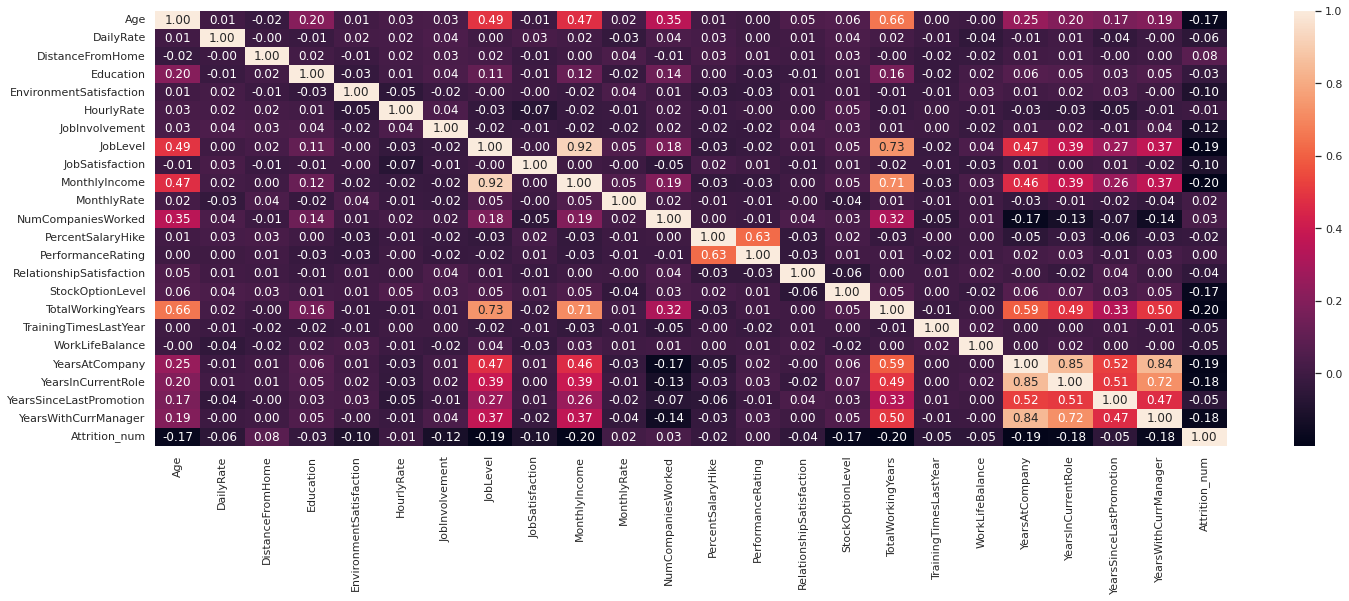

In [36]:
# Let us visualize these correlation values using a heatmap.

plt.figure(figsize=(24,8))
sns.heatmap(hr.corr(method ='spearman'), annot=True, fmt=".2f");

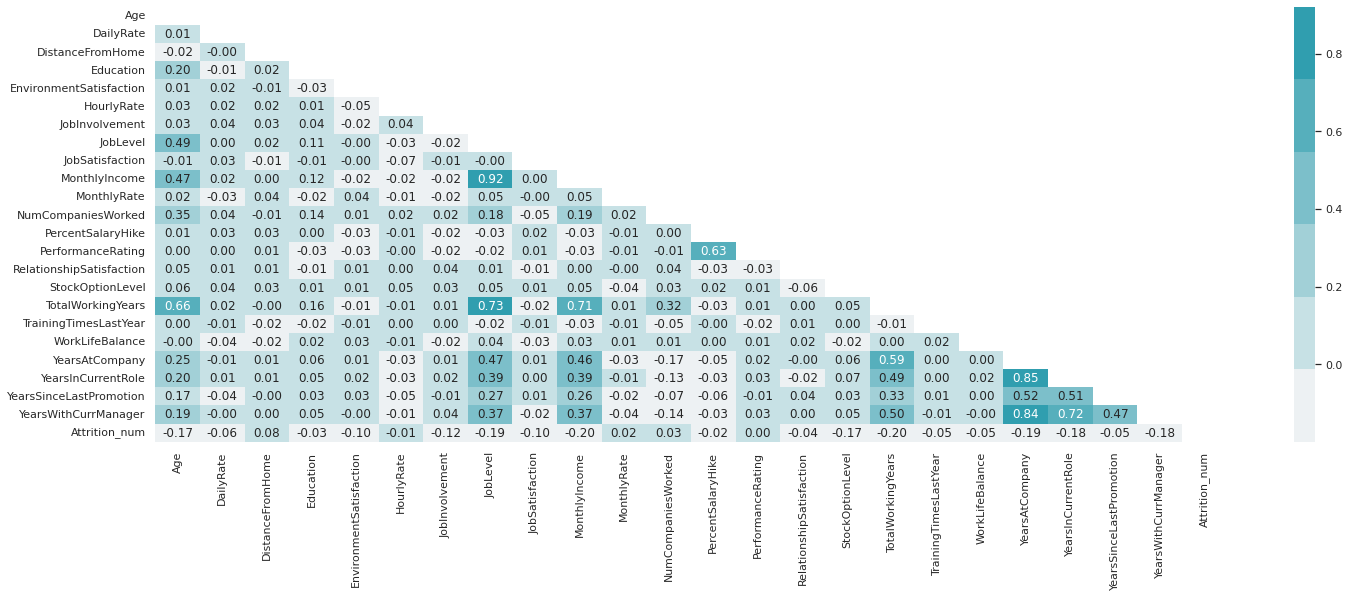

In [37]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle
mask = np.zeros_like(hr.corr(method ='spearman'), 
                     dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(hr.corr(method ='spearman'),
            mask=mask, 
            cmap=cmap, 
            annot=True, 
            fmt=".2f");

In [38]:
correlation_mat = hr.corr(method ='spearman')

# Selecting only the lower triangular part of the correlation matrix
lower_triangle = correlation_mat.where(np.tril(np.ones(correlation_mat.shape), k=-1).astype(bool))

# Unstack the lower triangular matrix
corr_pairs = lower_triangle.unstack().dropna()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.abs().sort_values(kind="quicksort")

# Selecting strong correlation pairs (excluding duplicates and absolute correlation of 1)
strong_pairs = sorted_pairs[(sorted_pairs > 0.7) & (sorted_pairs != 1)]

print(strong_pairs.sort_values(ascending = False))

JobLevel            MonthlyIncome          0.92
YearsAtCompany      YearsInCurrentRole     0.85
                    YearsWithCurrManager   0.84
JobLevel            TotalWorkingYears      0.73
YearsInCurrentRole  YearsWithCurrManager   0.72
MonthlyIncome       TotalWorkingYears      0.71
dtype: float64


<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 18px;">


### Observations

- **Higher job level and more total working years (experience) are associated with higher monthly income.** 
- **We don't see any strong correlations with our Attrition_num feature.**

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

## Machine Learning Approach

- With Attrition as the target variable

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Pre-processing

In [42]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [43]:
col_numerical = list(hr.select_dtypes(include=['float64', 'int64']).columns)
col_numerical.remove('Attrition_num')
col_numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hr_num = scaler.fit_transform(hr[col_numerical])

hr_num = pd.DataFrame(hr_num, columns=hr[col_numerical].columns)

In [45]:
col_categorical = list(hr.select_dtypes(include=['object']).columns)
col_categorical.remove('Attrition')
col_categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [46]:
hr_cat = pd.get_dummies(hr[col_categorical])

hr_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [47]:
X = pd.concat([hr_num, hr_cat], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.45,0.74,-1.01,-0.89,-0.66,1.38,0.38,-0.06,1.15,-0.11,0.73,2.13,-1.15,-0.43,-1.58,-0.93,-0.42,-2.17,-2.49,-0.16,-0.06,-0.68,0.25,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.32,-1.30,-0.15,-1.87,0.25,-0.24,-1.03,-0.06,-0.66,-0.29,1.49,-0.68,2.13,2.35,1.19,0.24,-0.16,0.16,0.34,0.49,0.76,-0.37,0.81,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.01,1.41,-0.89,-0.89,1.17,1.28,-1.03,-0.96,0.25,-0.94,-1.67,1.32,-0.06,-0.43,-0.66,-0.93,-0.55,0.16,0.34,-1.14,-1.17,-0.68,-1.16,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.43,1.46,-0.76,1.06,1.17,-0.49,0.38,-0.96,0.25,-0.76,1.24,-0.68,-1.15,-0.43,0.27,-0.93,-0.42,0.16,0.34,0.16,0.76,0.25,-1.16,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-1.09,-0.52,-0.89,-1.87,-1.58,-1.27,0.38,-0.96,-0.66,-0.64,0.33,2.53,-0.88,-0.43,1.19,0.24,-0.68,0.16,0.34,-0.82,-0.62,-0.06,-0.60,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [48]:
y = hr['Attrition_num']
y.head()

y.value_counts() #unmbalanced

0    1233
1     237
Name: Attrition_num, dtype: int64

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Fitting Predictive Models

### Model 1.0 (LogisticRegression)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

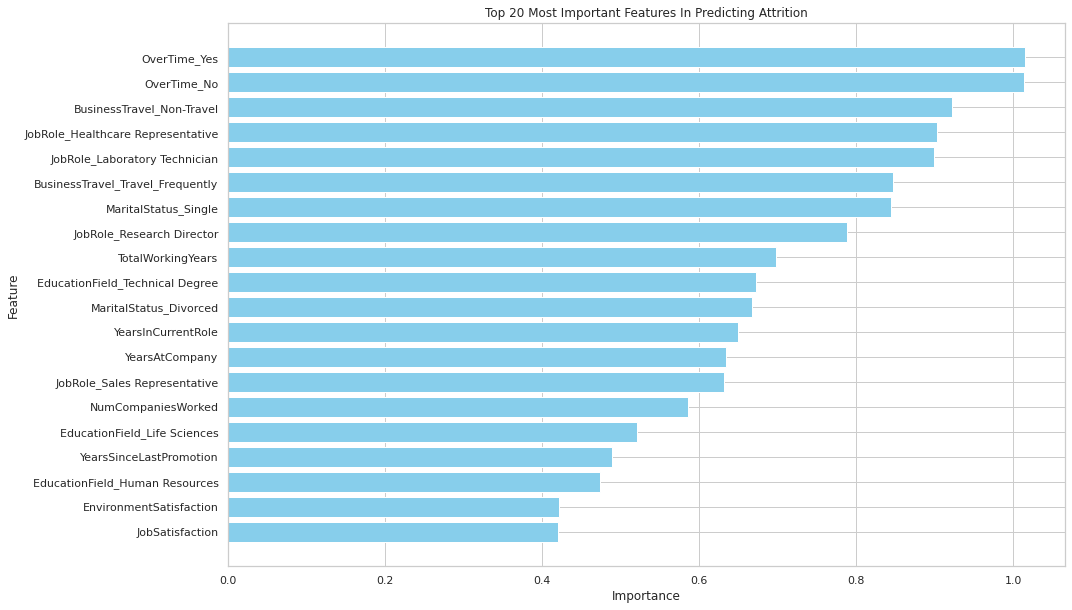

In [52]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

top_20_features = feature_importance.tail(20)

# Plotting
plt.figure(figsize=(15, 10))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features In Predicting Attrition')
plt.show()

### Model 2.0 (SGDClassifier)

In [58]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(random_state = 0)
sgdc.fit(X_train,y_train)

SGDClassifier(random_state=0)

### Model 3.0 (Support Vector Machine)

In [59]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

### Model 4.0 (Random Forest Classifier)

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [164]:
shap_values

[array([[-0.0101189 ,  0.01253491,  0.01586797, ..., -0.03223596,
          0.02155911,  0.01936674],
        [ 0.0026081 ,  0.00284481, -0.01172526, ...,  0.01182239,
          0.01507962,  0.01256158],
        [-0.05575341,  0.00270972, -0.04148065, ...,  0.02251432,
          0.03066732,  0.02845147],
        ...,
        [-0.05651878,  0.00715207,  0.02279118, ...,  0.01087357,
         -0.06694763, -0.05476383],
        [ 0.01652496, -0.01389396,  0.00697739, ...,  0.0048006 ,
          0.01485371,  0.01337133],
        [ 0.02644792, -0.02341958,  0.02172876, ...,  0.01970008,
         -0.07790893, -0.06011196]]),
 array([[ 0.0101189 , -0.01253491, -0.01586797, ...,  0.03223596,
         -0.02155911, -0.01936674],
        [-0.0026081 , -0.00284481,  0.01172526, ..., -0.01182239,
         -0.01507962, -0.01256158],
        [ 0.05575341, -0.00270972,  0.04148065, ..., -0.02251432,
         -0.03066732, -0.02845147],
        ...,
        [ 0.05651878, -0.00715207, -0.02279118, ..., -

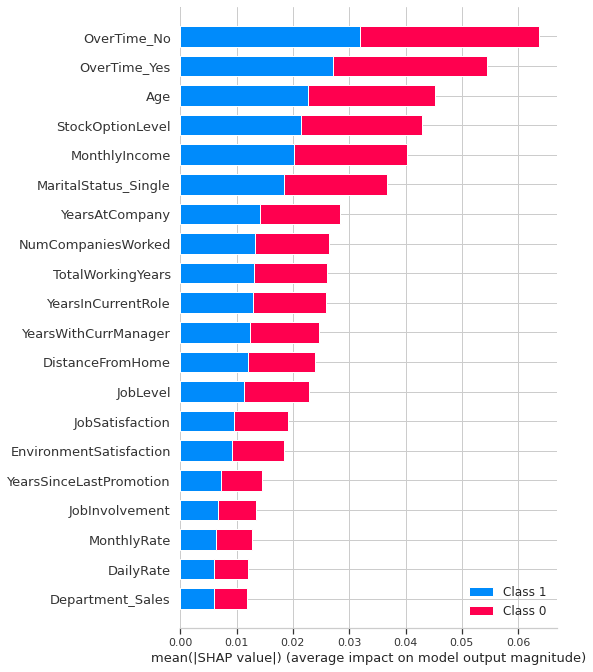

In [154]:
import shap
# Create a SHAP explainer for your Logistic Regression model


explainer = shap.Explainer(rf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

top_feature_names = X_test.columns.to_numpy()[np.argsort(np.abs(shap_values).mean(0))[::-1]][:20]



#Plot the SHAP summary plot (summary_plot) for the top 20 features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", max_display=20)

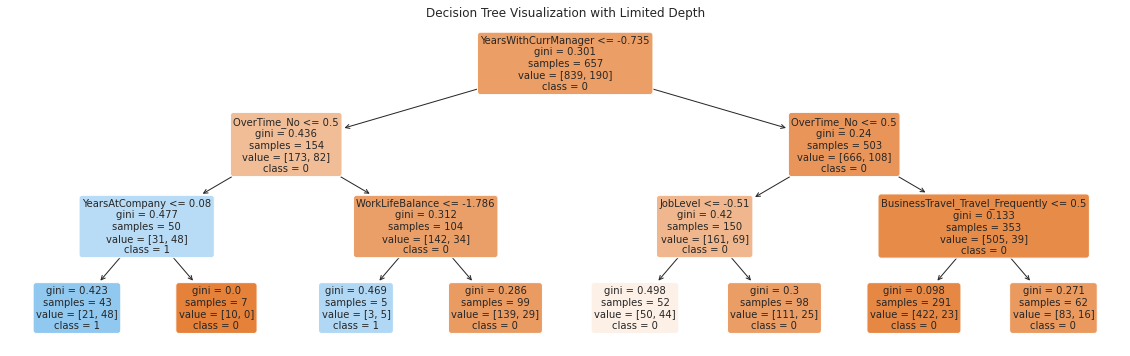

In [158]:
from sklearn import tree
# Visualize one of the decision trees
rf = RandomForestClassifier(n_estimators=1, max_depth=3)  # Adjust max_depth as needed
rf.fit(X_train, y_train)

# Get the first (and only) decision tree from the forest
tree_to_plot = rf.estimators_[0]

# Plot the decision tree with a limited number of branches
plt.figure(figsize=(20, 6))
tree.plot_tree(tree_to_plot,
               feature_names=X_train.columns,
               class_names=list(map(str, rf.classes_)),
               filled=True,
               rounded=True,
               fontsize=10)  # Adjust fontsize as needed
plt.title("Decision Tree Visualization with Limited Depth")
plt.show()

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Model Evaluation

### LR

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
lr_score = lr.score(X_test, y_test)
lr_score

0.8707482993197279

In [66]:
cross_val_score(lr, X_train, y_train, cv=10, scoring='accuracy')

array([0.88349515, 0.90291262, 0.91262136, 0.89320388, 0.81553398,
       0.86407767, 0.86407767, 0.88349515, 0.86407767, 0.83333333])

### SGDC

In [68]:
sgdc_score = sgdc.score(X_test, y_test)
sgdc_score

0.8231292517006803

In [69]:
cross_val_score(sgdc, X_train, y_train, cv=10, scoring='accuracy')

array([0.75728155, 0.90291262, 0.90291262, 0.83495146, 0.81553398,
       0.86407767, 0.85436893, 0.82524272, 0.86407767, 0.65686275])

### SVM

In [71]:
svm_score = svm.score(X_test, y_test)
svm_score

0.8798185941043084

In [72]:
cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')

array([0.84466019, 0.86407767, 0.88349515, 0.84466019, 0.81553398,
       0.85436893, 0.84466019, 0.86407767, 0.87378641, 0.84313725])

## RF

In [74]:
rf_score = rf.score(X_test, y_test)
rf_score
cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')


array([0.7961165 , 0.82524272, 0.84466019, 0.81553398, 0.81553398,
       0.82524272, 0.84466019, 0.82524272, 0.84466019, 0.85294118])

### Compare Models

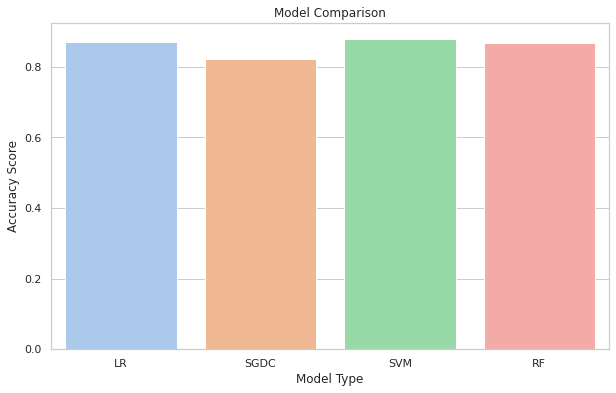

  Model Type  Score
0         LR   0.87
1       SGDC   0.82
2        SVM   0.88
3         RF   0.87


In [76]:
models = {'LR': lr_score, 'SGDC': sgdc_score, 'SVM': svm_score, 'RF': rf_score}
modeltype = list(models.keys())
scores = list(models.values())

df = pd.DataFrame({'Model Type': modeltype, 'Score': scores})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model Type', y='Score', data=df, palette='pastel')
plt.xlabel("Model Type")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()
print(df)

<div style="background-color: gray; padding: 10px; border-radius: 5px; color: white; font-size: 18px;">

### Fitting An Inferential Model

In [176]:
#Finding p-values for each independent feature

import statsmodels.api as sm
from tabulate import tabulate

results = []

for feature in X.columns:
    # Add a constant term to the features matrix
    X_train_constant = sm.add_constant(X[feature])
    
    # Fit logistic regression model
    logit_model = sm.Logit(y, X_train_constant)
    result = logit_model.fit(disp=0)  # disp=0 to suppress convergence messages
    
    # Get p-value and coefficient for the feature
    p_value = result.pvalues[feature]
    coefficient = result.params[feature]
    
    # Append results to the list
    results.append({'Feature': feature, 'Coefficient': coefficient, 'P-Value': p_value})

# Create DataFrame from results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P-Value', ascending=True)

# Display the DataFrame
print(tabulate(results_df[results_df['P-Value'] < 0.05], headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════════════════╤═══════════════╤═════════════╕
│ Feature                           │   Coefficient │     P-Value │
╞═══════════════════════════════════╪═══════════════╪═════════════╡
│ OverTime_No                       │     -1.32741  │ 1.35186e-19 │
├───────────────────────────────────┼───────────────┼─────────────┤
│ OverTime_Yes                      │      1.32741  │ 1.35186e-19 │
├───────────────────────────────────┼───────────────┼─────────────┤
│ MaritalStatus_Single              │      0.95071  │ 4.67532e-11 │
├───────────────────────────────────┼───────────────┼─────────────┤
│ TotalWorkingYears                 │     -0.6046   │ 1.69007e-10 │
├───────────────────────────────────┼───────────────┼─────────────┤
│ JobLevel                          │     -0.585347 │ 2.91299e-10 │
├───────────────────────────────────┼───────────────┼─────────────┤
│ YearsInCurrentRole                │     -0.529804 │ 1.6063e-09  │
├───────────────────────────────────┼───────────

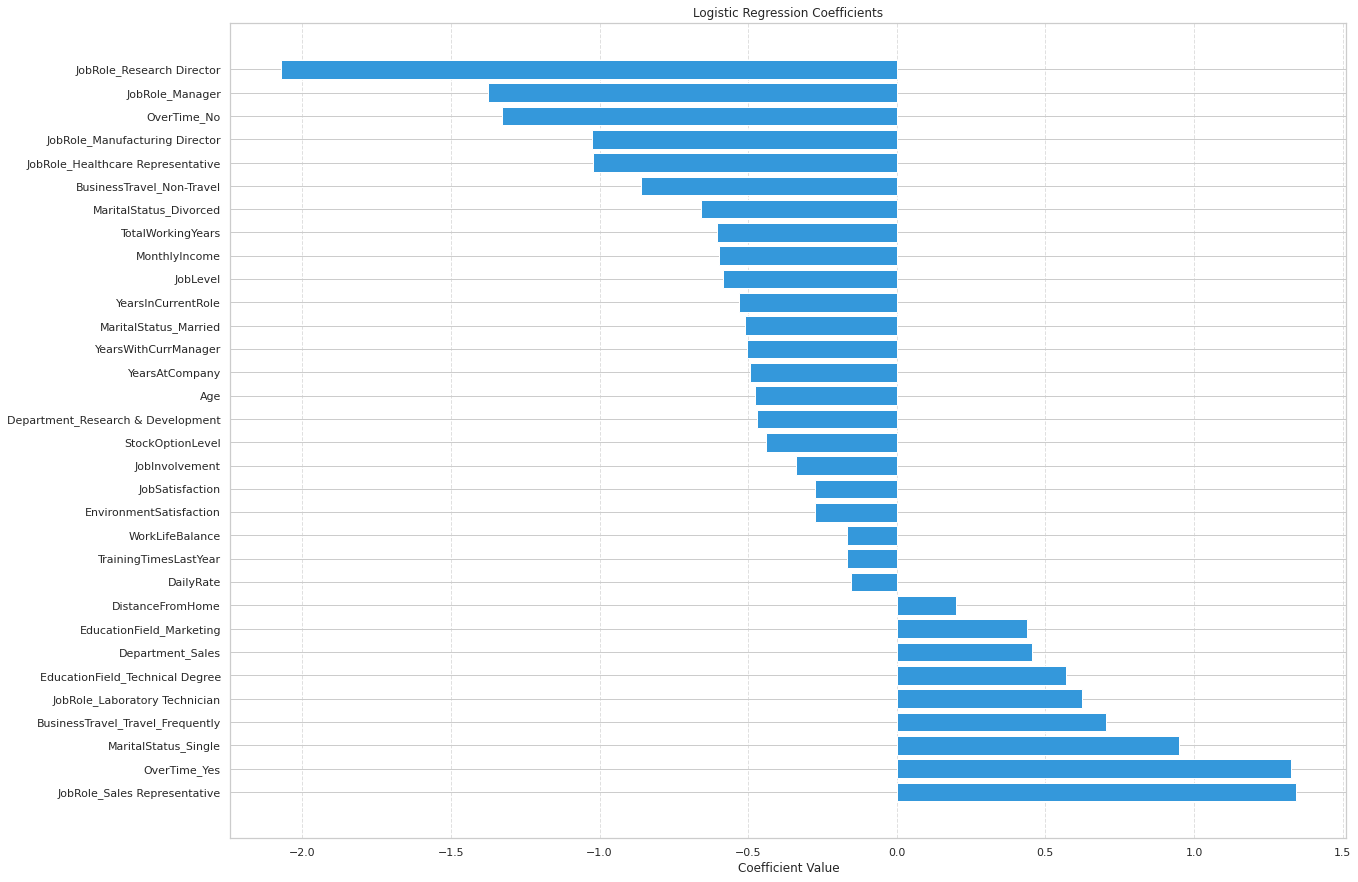

In [193]:
# Visualize coefficients


significant_results = results_df[results_df['P-Value'] < 0.05]
significant_results = significant_results.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(20, 15))
plt.barh(significant_results['Feature'], significant_results['Coefficient'], color='#3498db')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<div style="background-color: #3498db; padding: 15px; border-radius: 5px; color: white; font-size: 18px;">


### Observations from models

-**The variables listed above have shown statistical significance (based on p-values) and are likely to play a crucial role in predicting attrition in the analyzed dataset. It is recommended to consider these factors when assessing and addressing attrition-related challenges within the organization.**